In [1]:
import wrangle as w 
import os 
from env import get_db_url

import pandas as pd 
import numpy as np

from collections import Counter

from sklearn.model_selection import train_test_split

from datetime import date

import matplotlib.pyplot as plt
import seaborn as sns

# feature selection imports
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

# import scaling methods
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, QuantileTransformer
from scipy import stats

# import modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score

import mitosheet

In [2]:
train = w.get_exploration_data()

Using cached CSV
The following 34 columns were dropped because they were missing more than 50.0% of data: 
['airconditioningtypeid', 'architecturalstyletypeid', 'basementsqft', 'buildingclasstypeid', 'decktypeid', 'finishedfloor1squarefeet', 'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50', 'finishedsquarefeet6', 'fireplacecnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa', 'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'regionidneighborhood', 'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid', 'yardbuildingsqft17', 'yardbuildingsqft26', 'numberofstories', 'fireplaceflag', 'taxdelinquencyflag', 'taxdelinquencyyear', 'airconditioningdesc', 'architecturalstyledesc', 'buildingclassdesc', 'storydesc', 'typeconstructiondesc']

0 rows were dropped because they were missing more than 50.0% of data
Yearbuilt converted to age. 



/var/folders/qn/sd1_3x2j4196db03067vql600000gn/T/ipykernel_12100/3926078447.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(column, figsize = (5,5))


['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'fips', 'latitude', 'longitude', 'lotsizesquarefeet', 'regionidcity', 'regionidzip', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount', 'censustractandblock', 'logerror', 'age', 'taxrate', 'structure_cost_per_sqft', 'land_cost_per_sqft', 'fiscal_quarter']
['propertycountylandusecode', 'county']


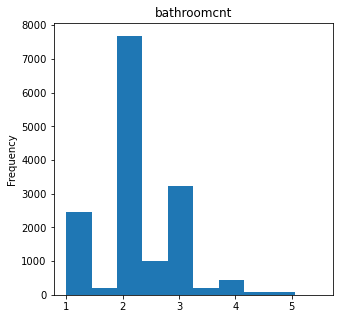

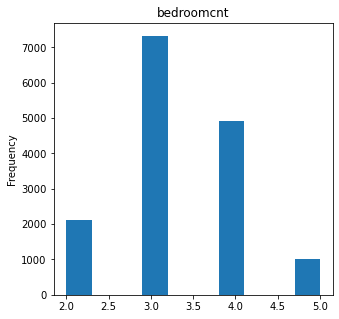

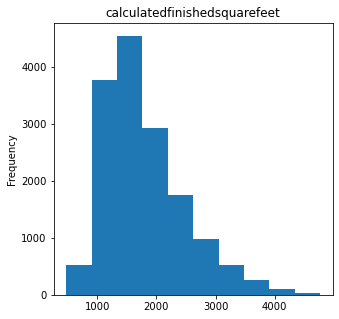

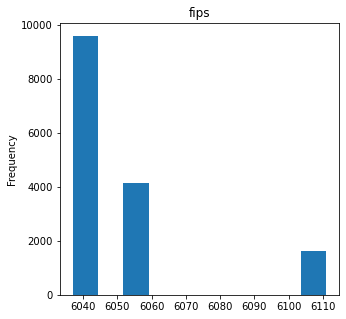

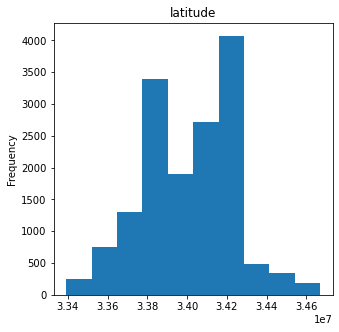

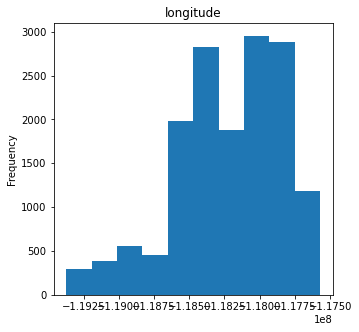

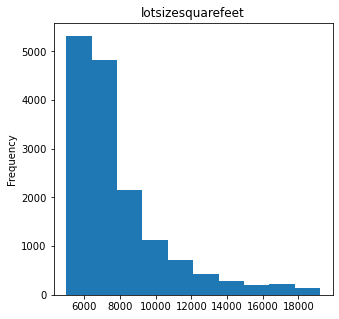

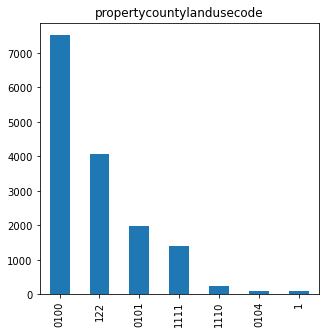

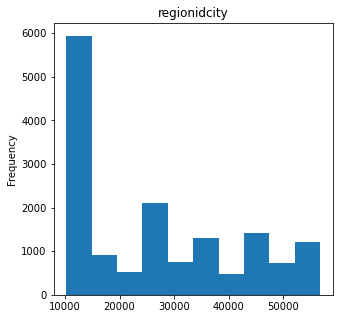

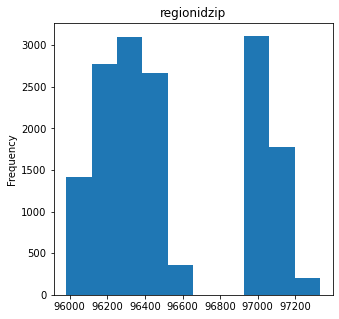

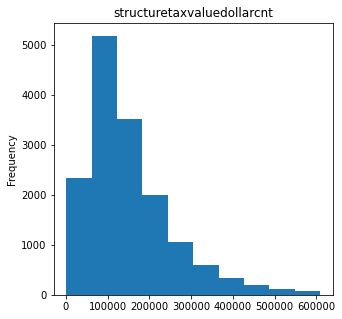

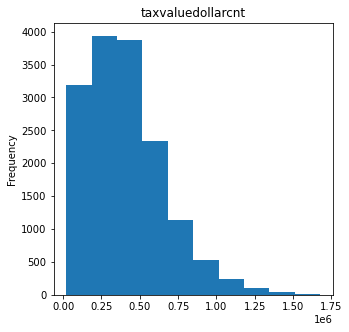

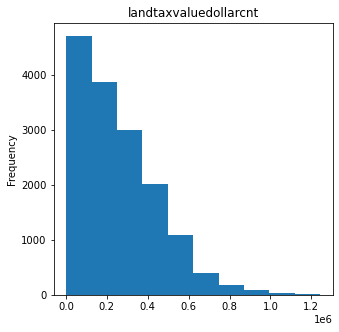

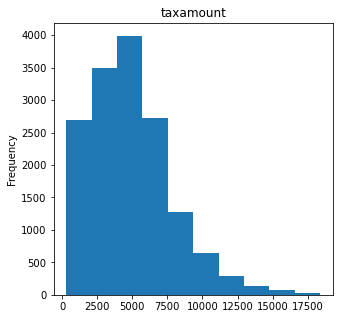

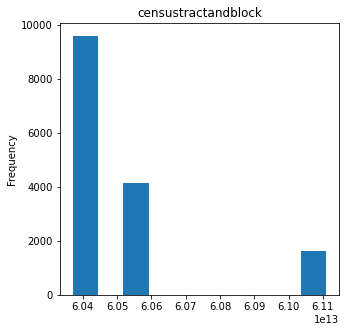

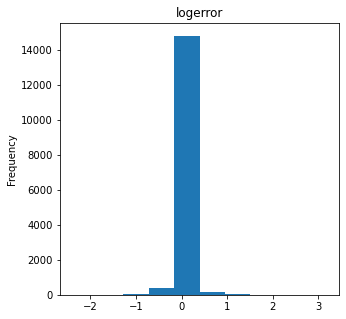

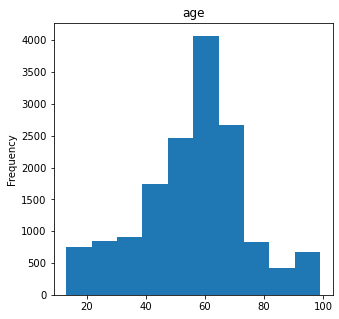

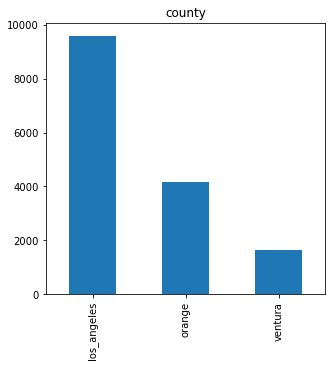

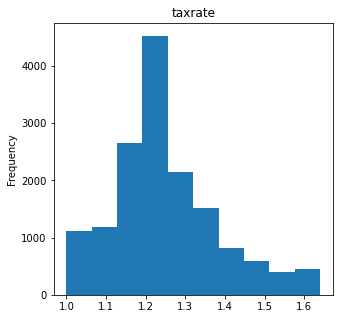

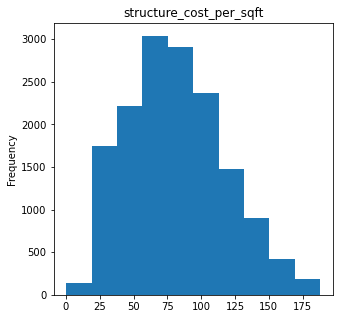

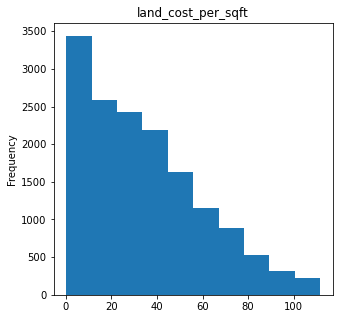

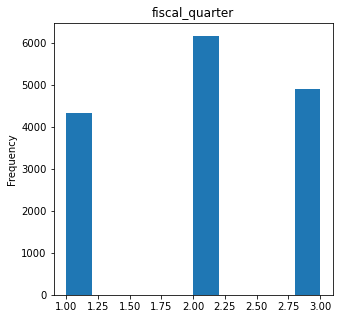

In [3]:
num_list = []
cat_list = []

for column in train:
    plt.figure(column, figsize = (5,5))
    plt.title(column)
    if pd.api.types.is_numeric_dtype(train[column]):
        train[column].plot(kind = 'hist')
        num_list.append(column)
    elif pd.api.types.is_string_dtype(train[column]) :
        # show only the TOP 10 value count in each categorical data
        train[column].value_counts()[:10].plot(kind = 'bar')
        cat_list.append(column)
        
print(num_list)
print(cat_list)

In [5]:
# # log transformation
# df('log expenses' ] = np. log2 (df('expenses' ] +1)
# plt.figure(1)
# df('expenses' ].plot (kind = 'hist')
# plt.figure(2)
# df('log expenses' ].plot (kind = 'hist')

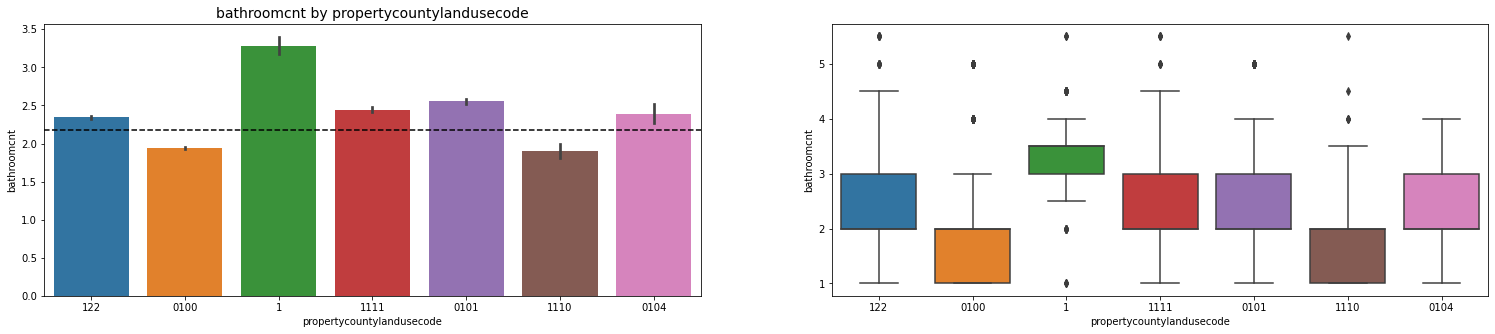

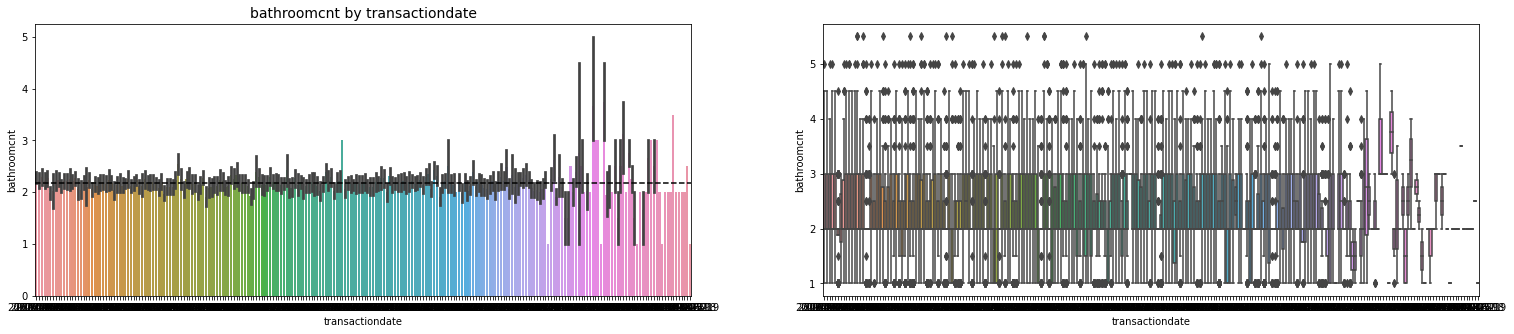

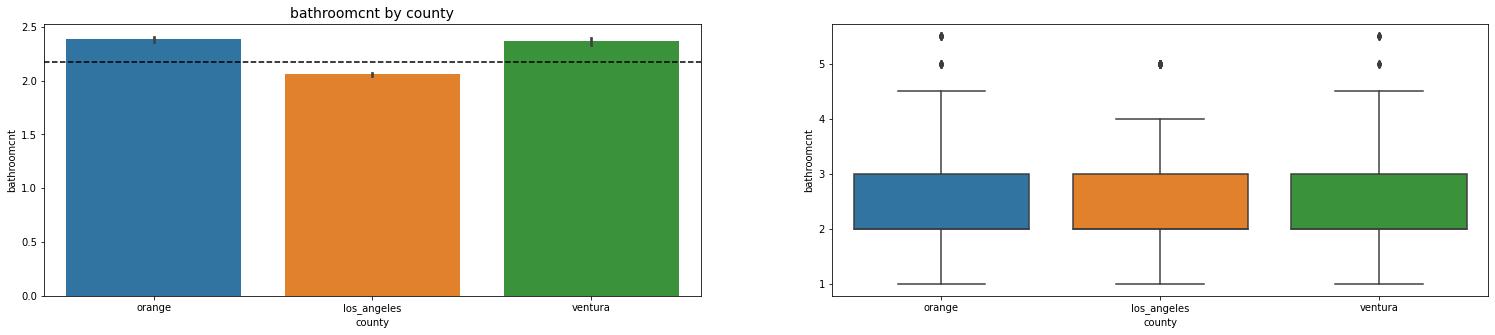

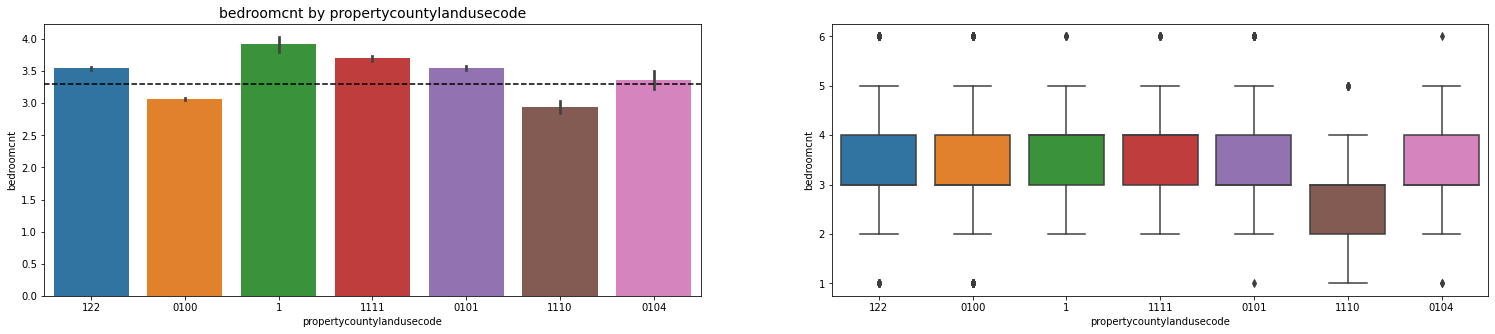

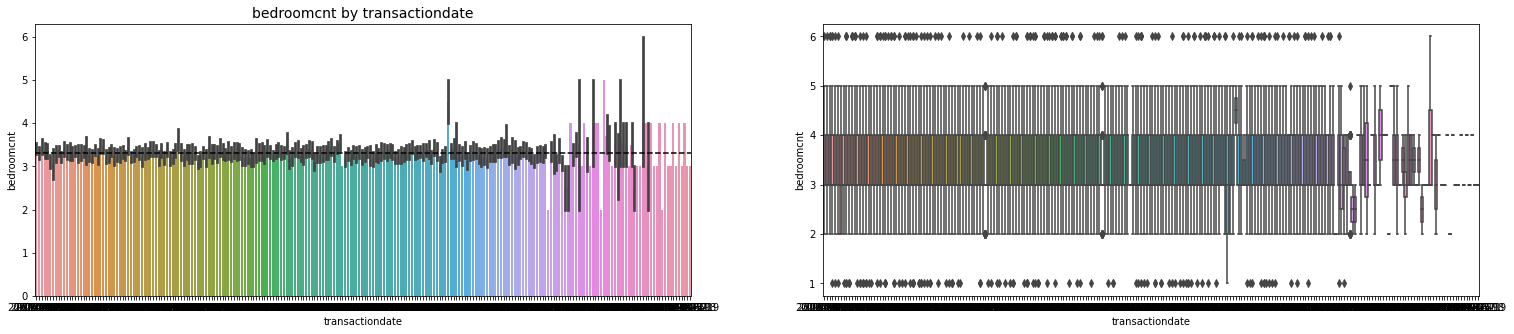

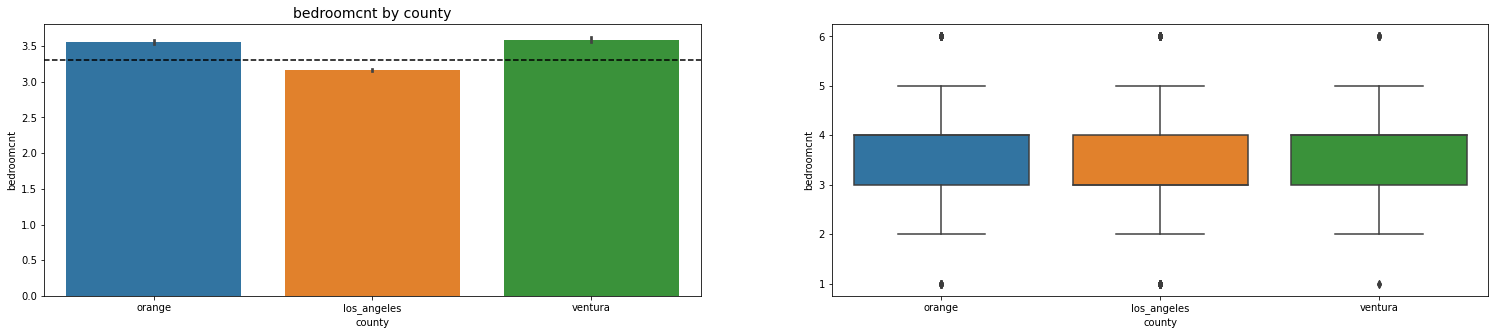

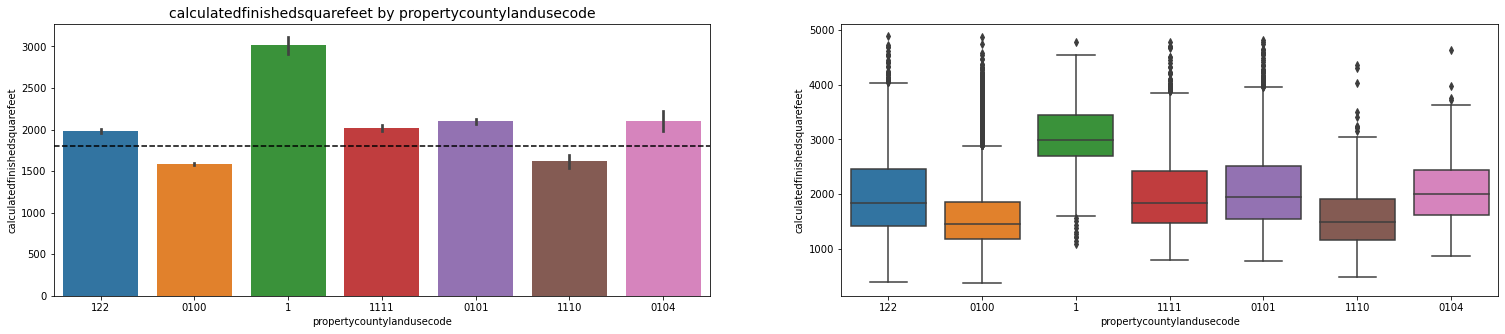

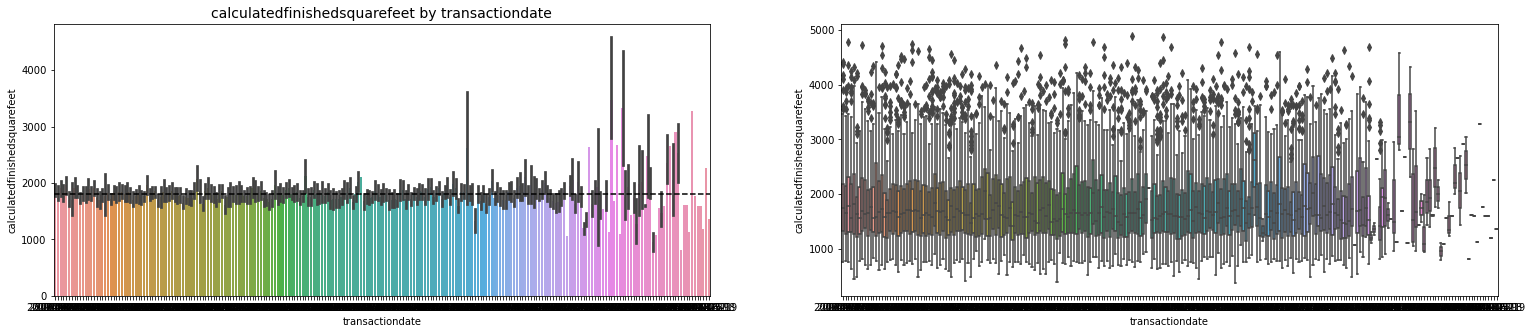

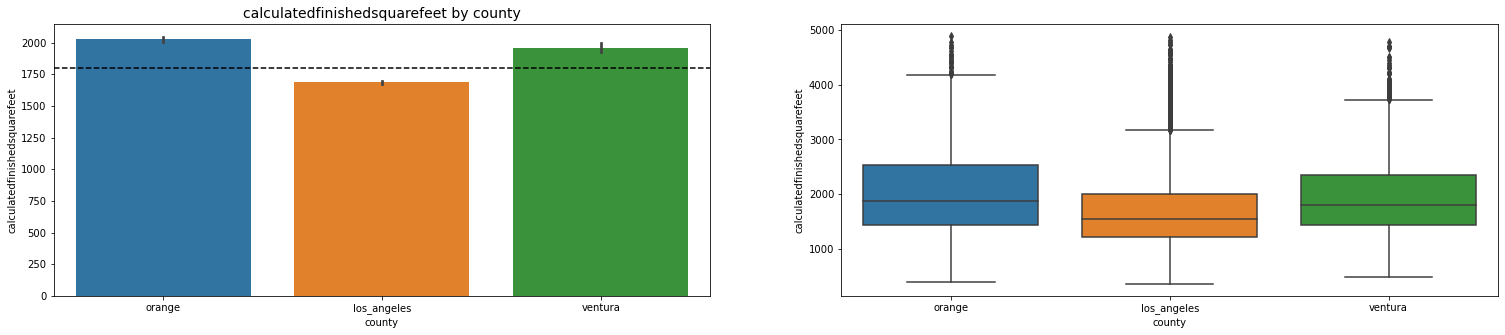

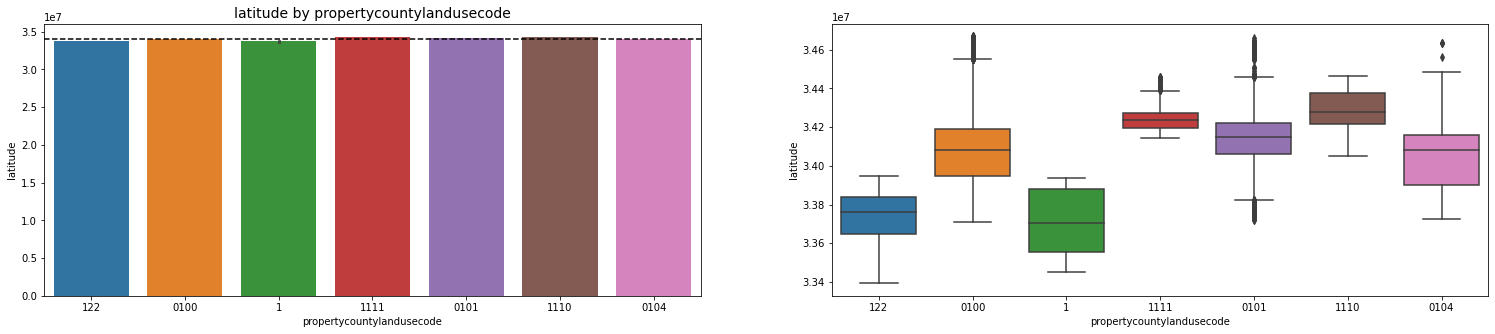

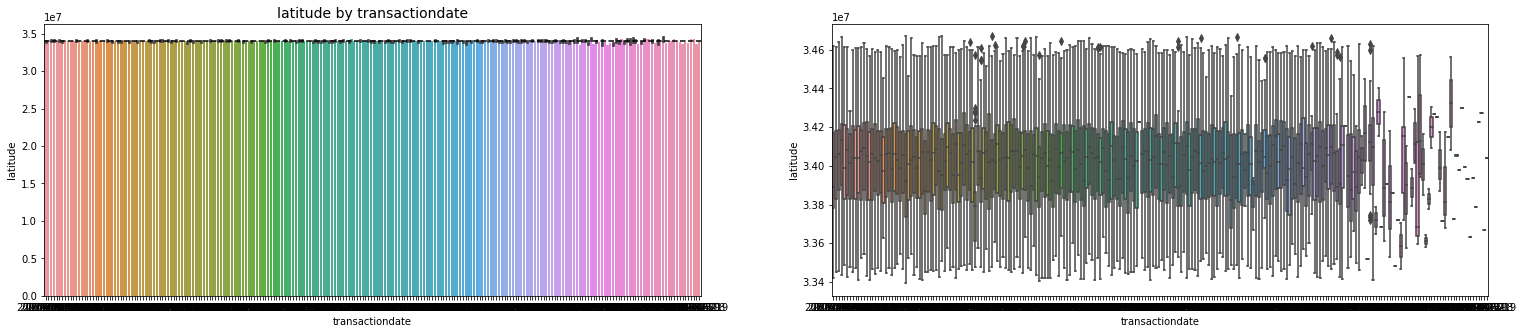

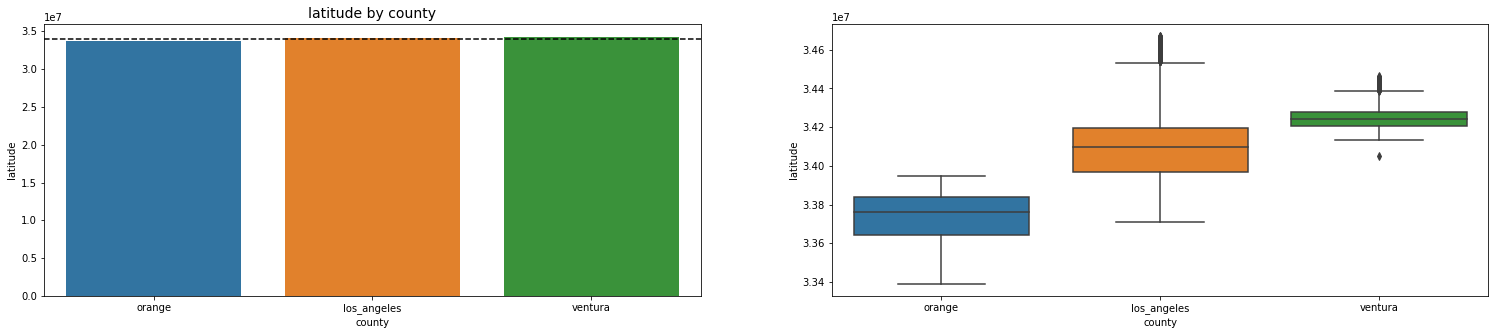

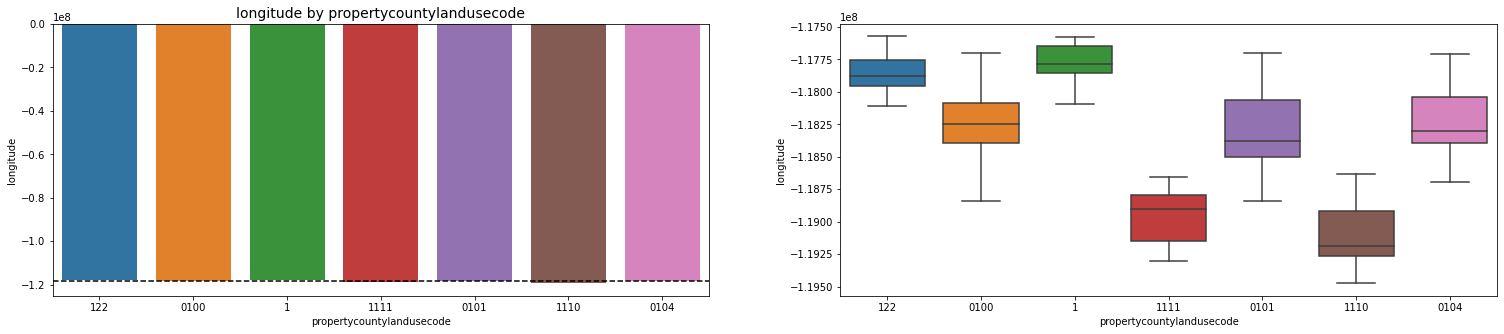

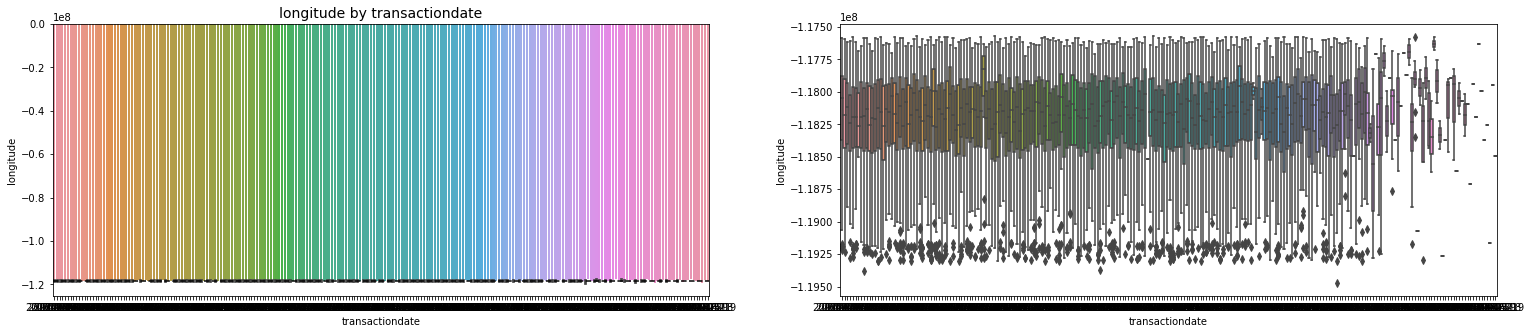

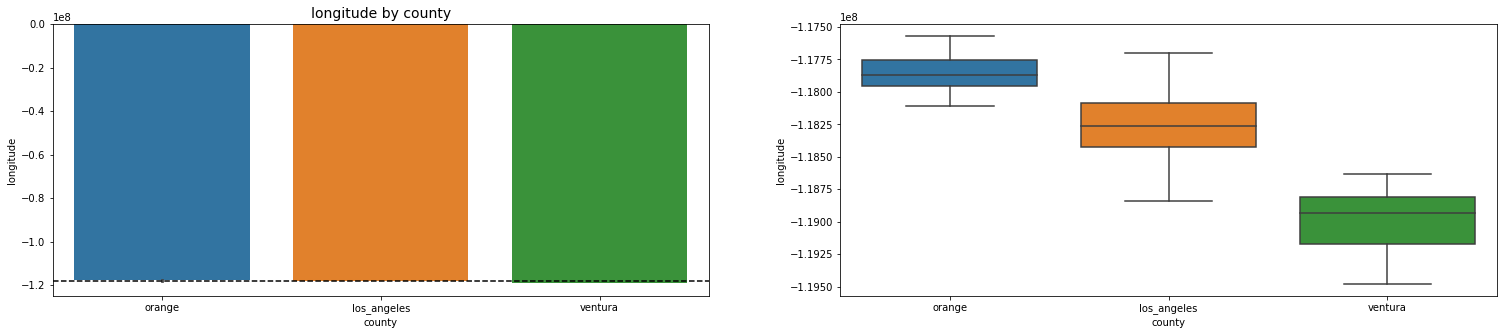

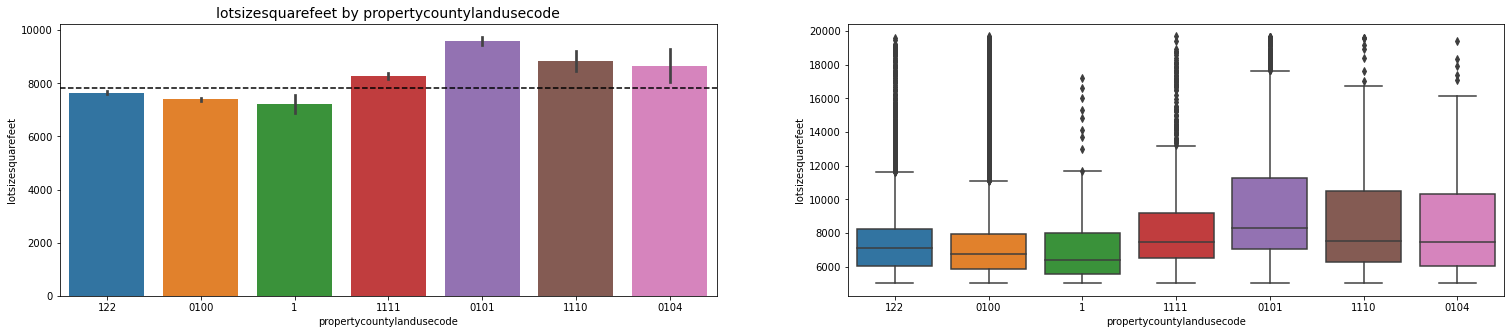

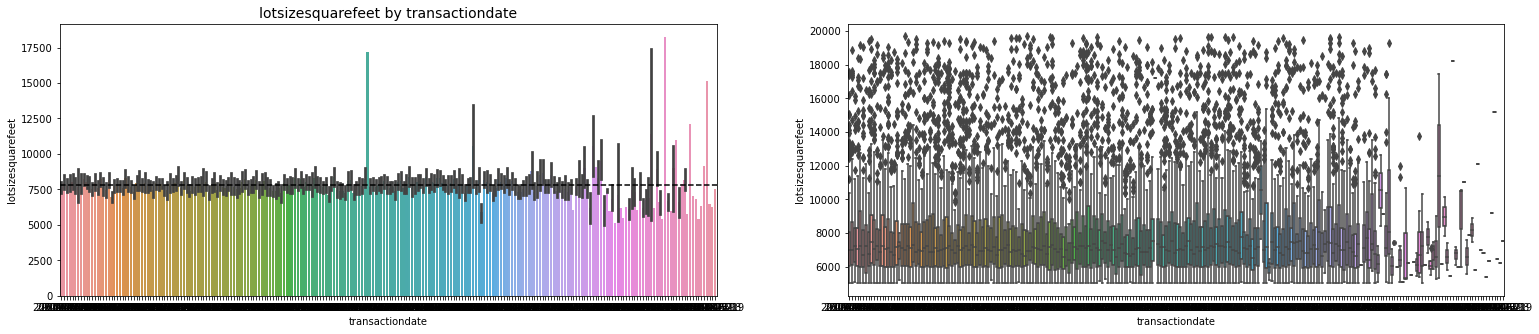

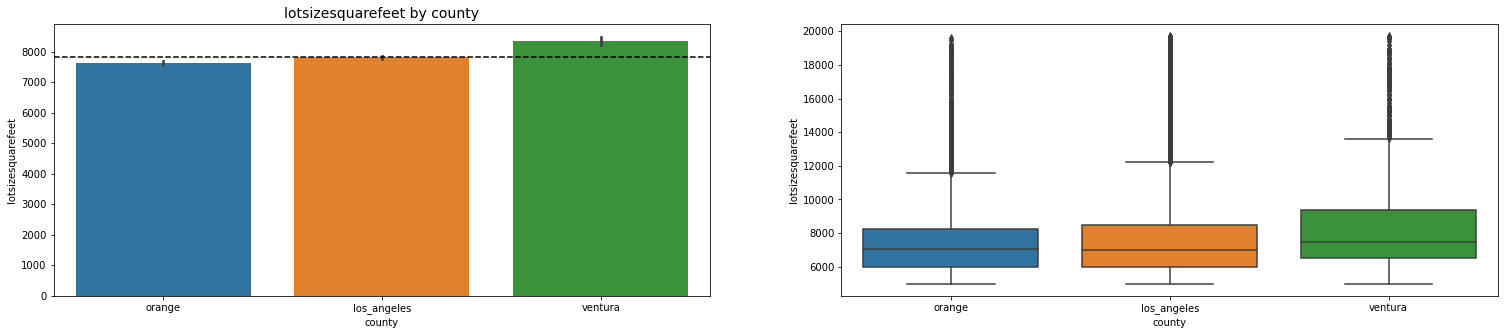

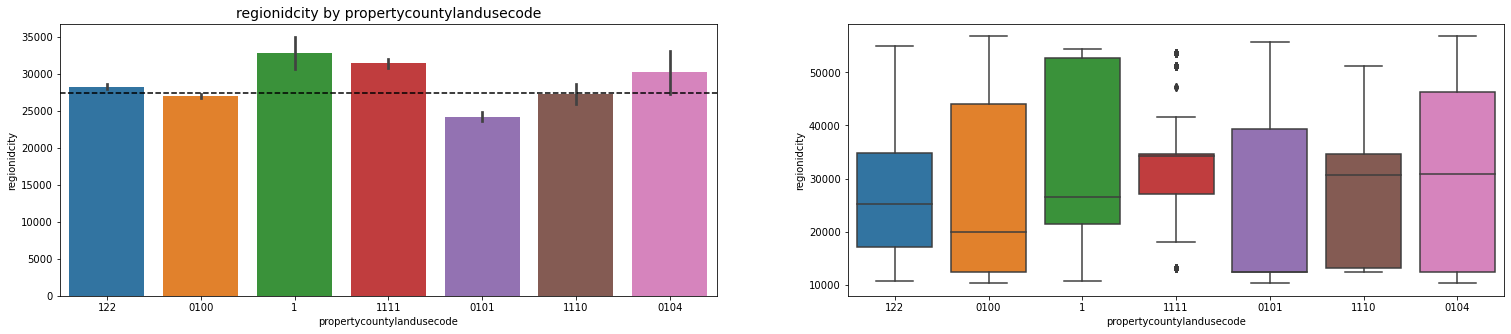

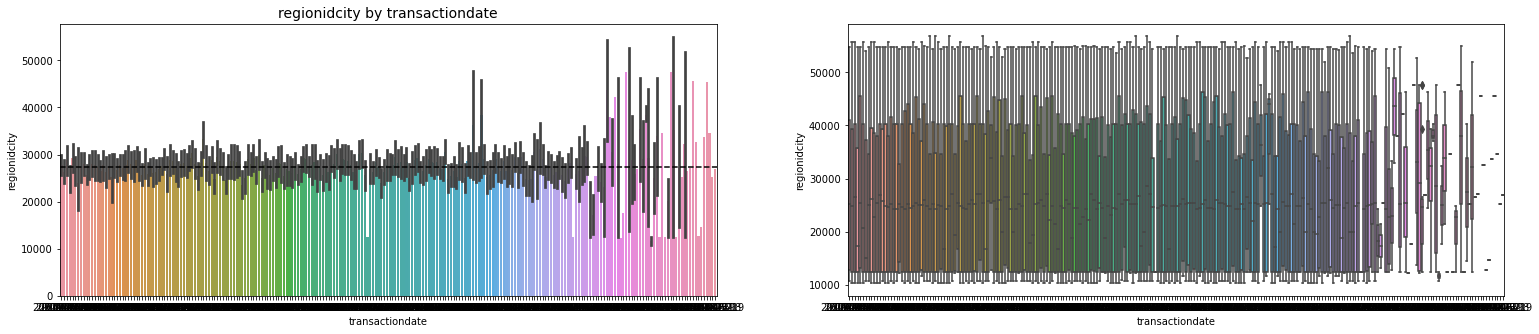

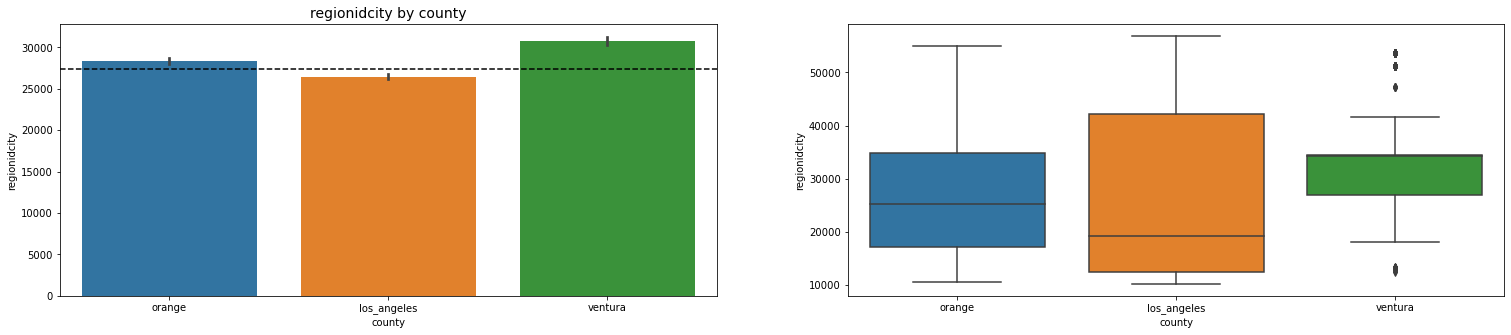

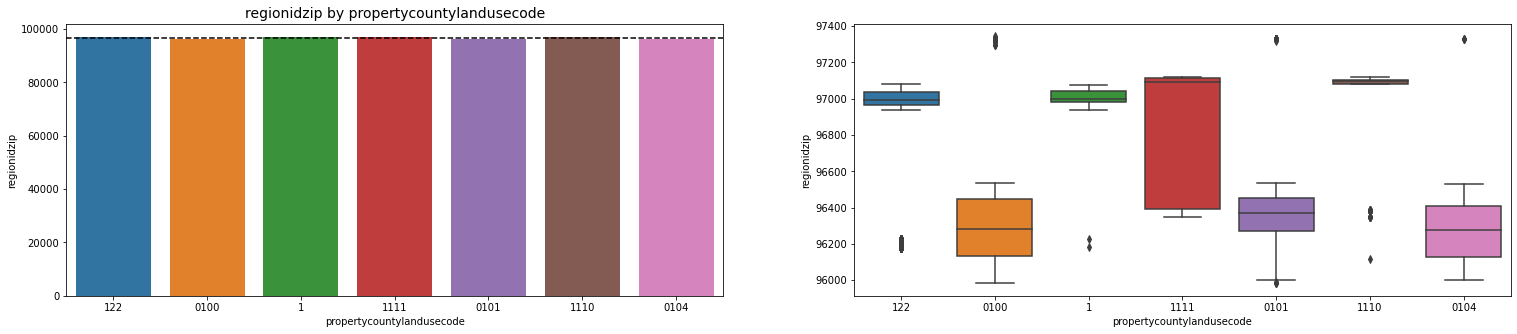

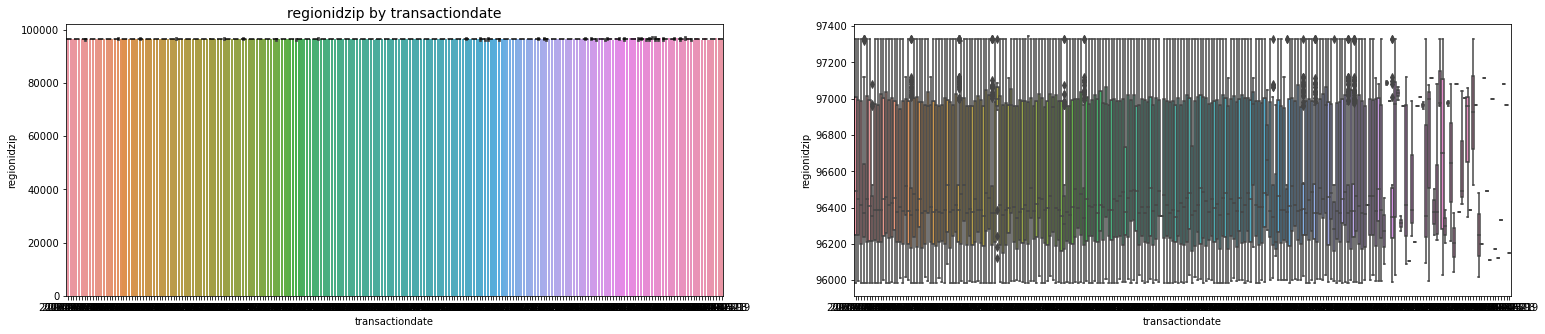

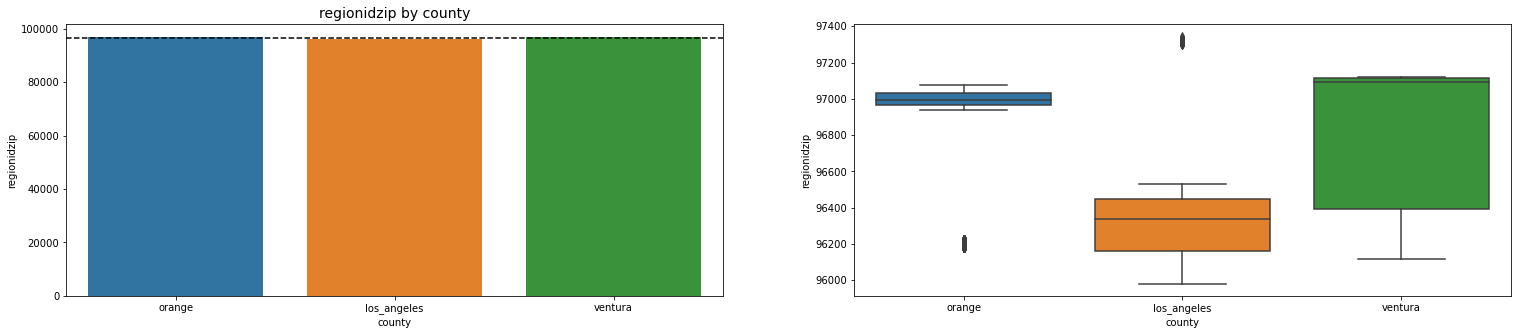

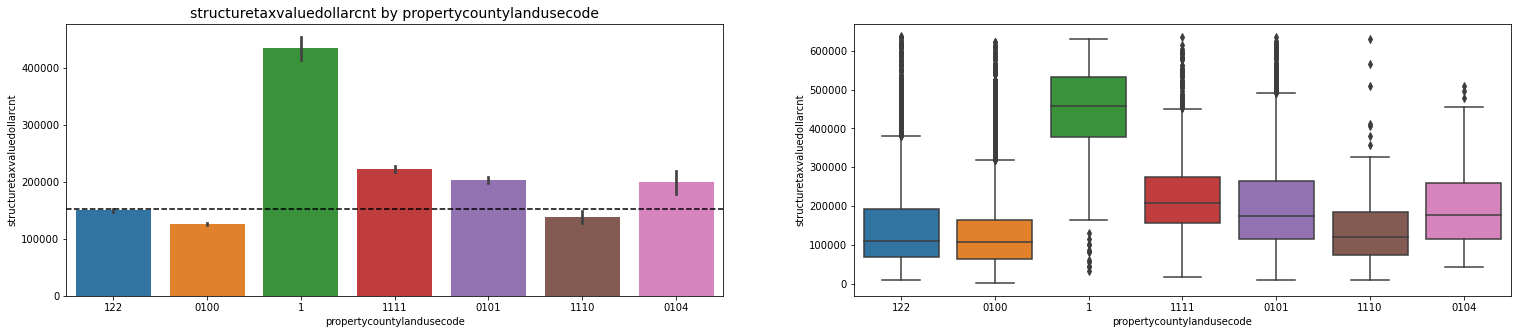

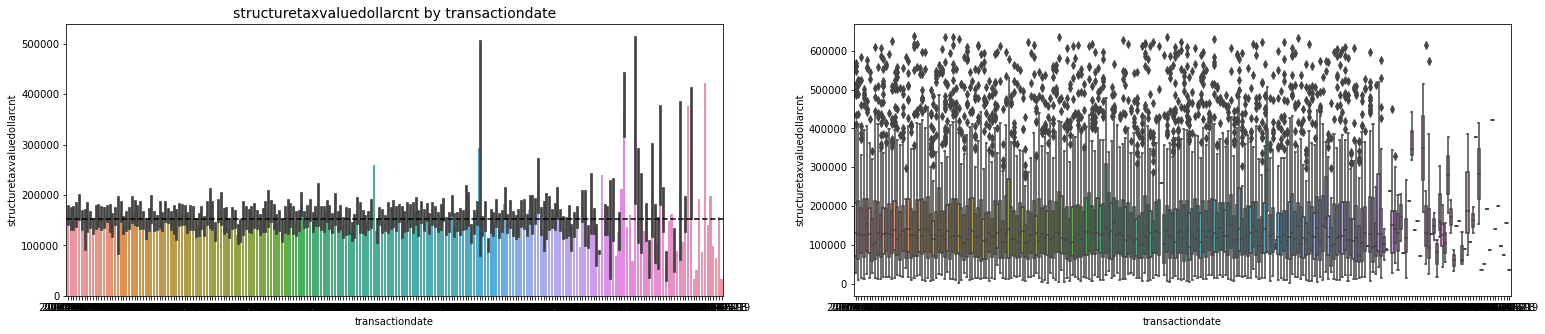

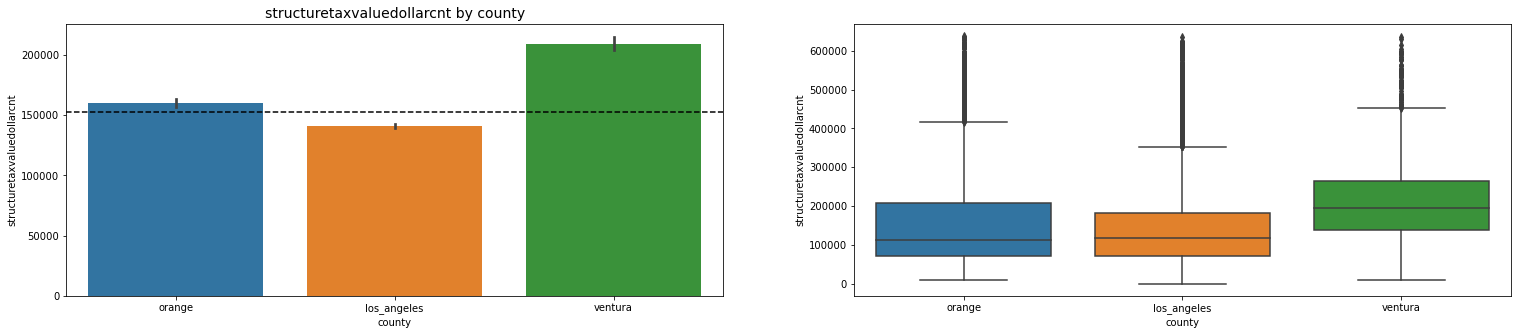

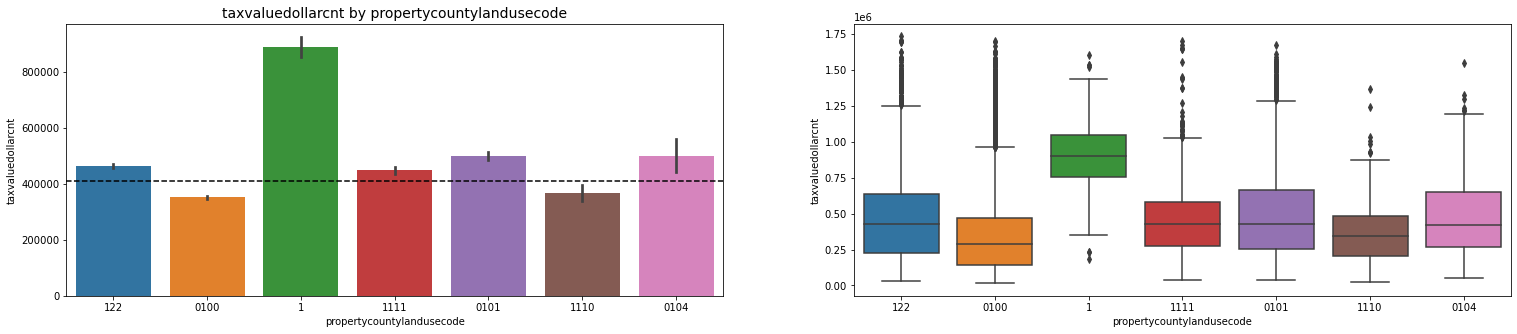

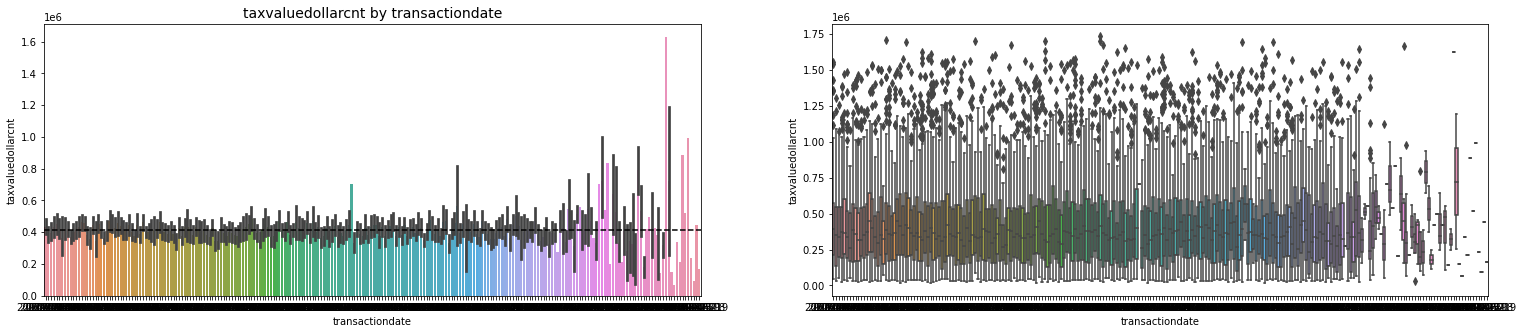

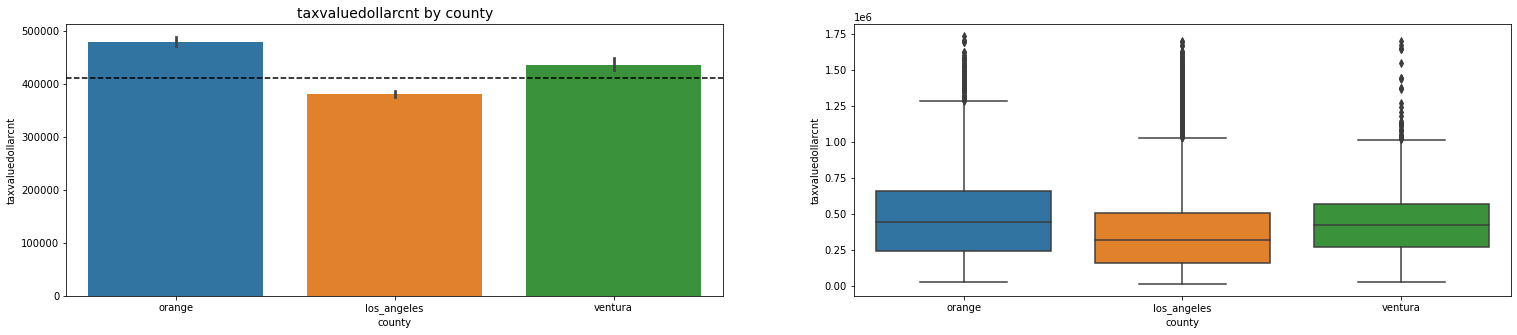

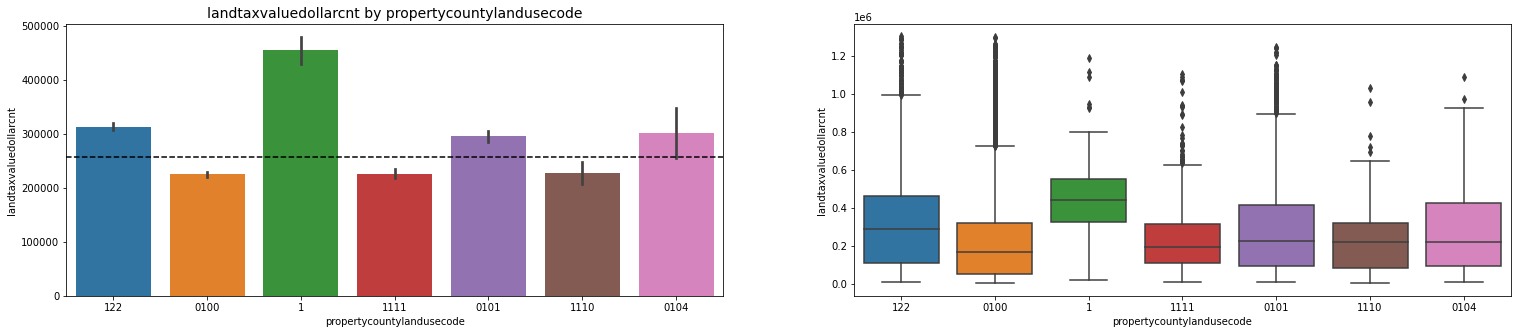

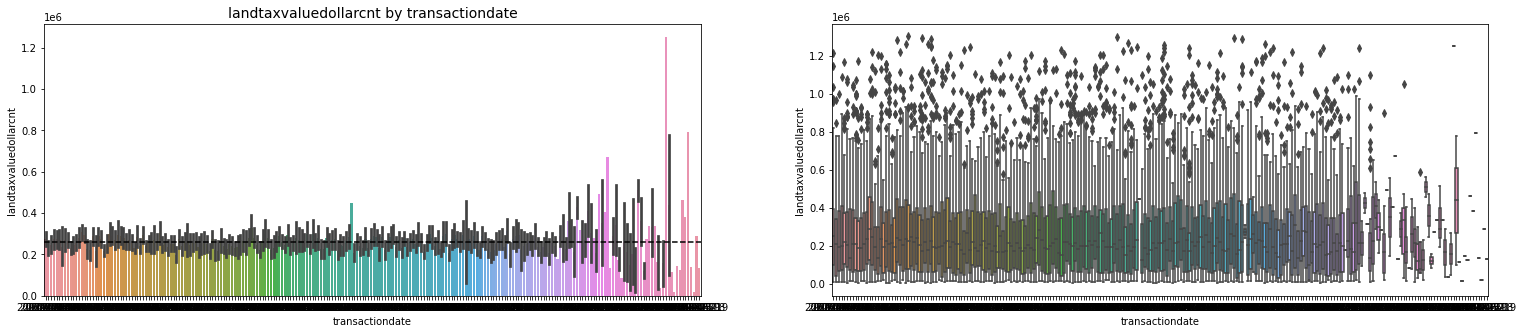

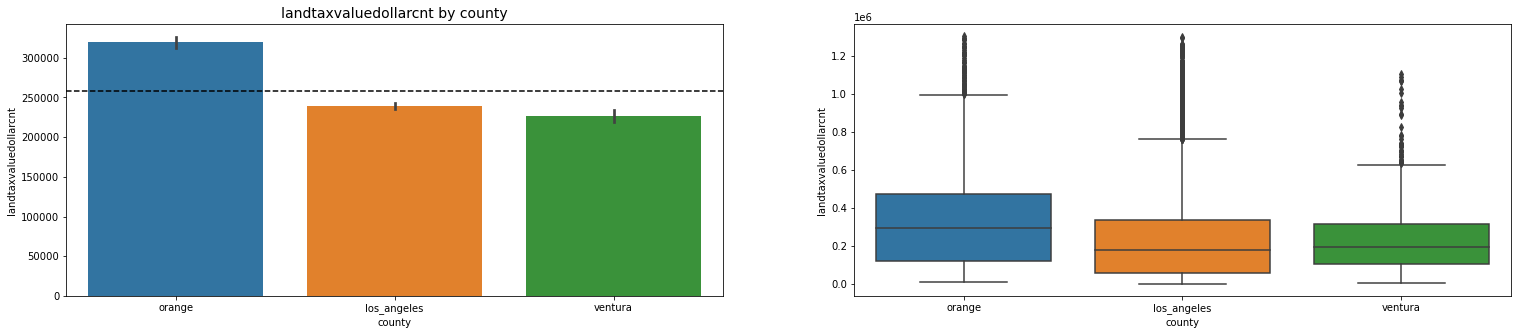

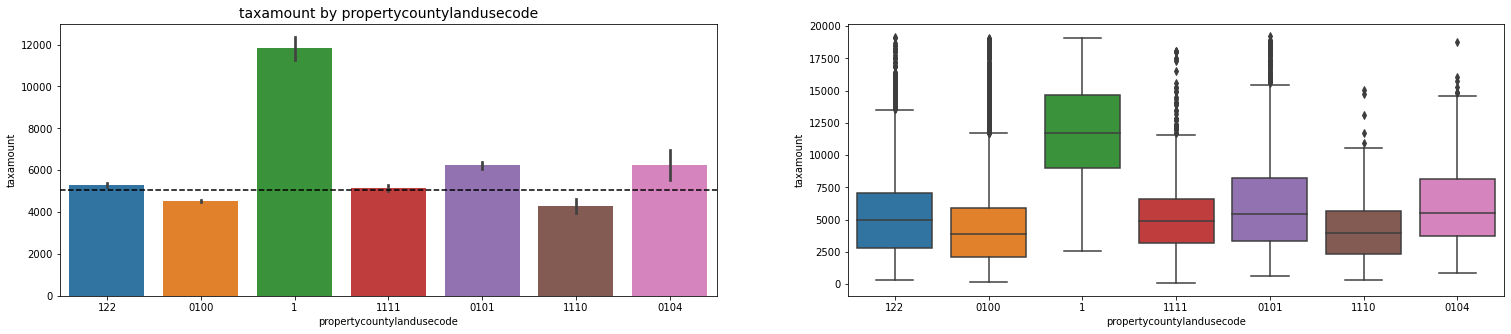

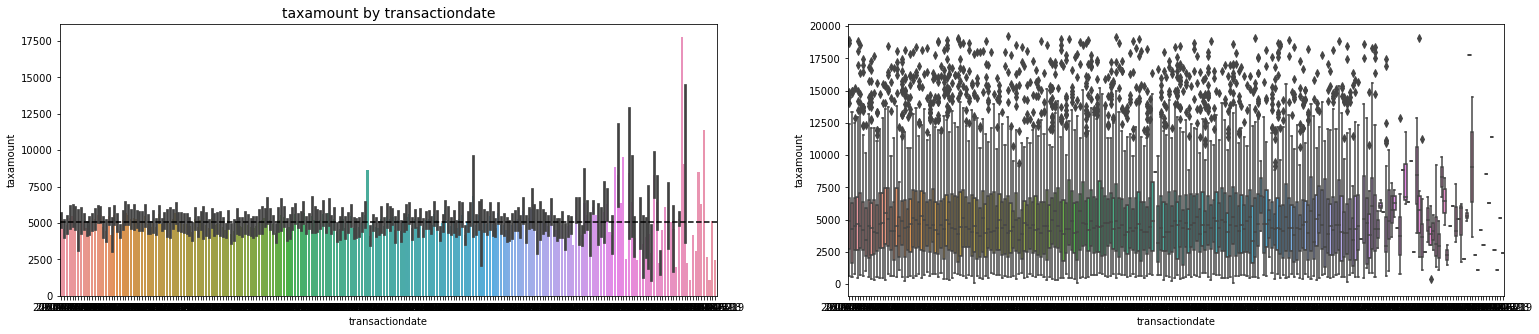

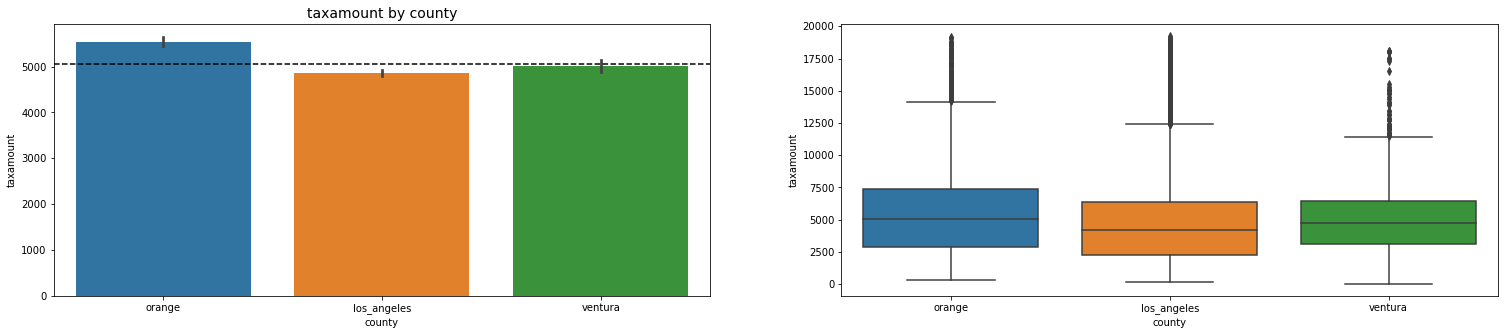

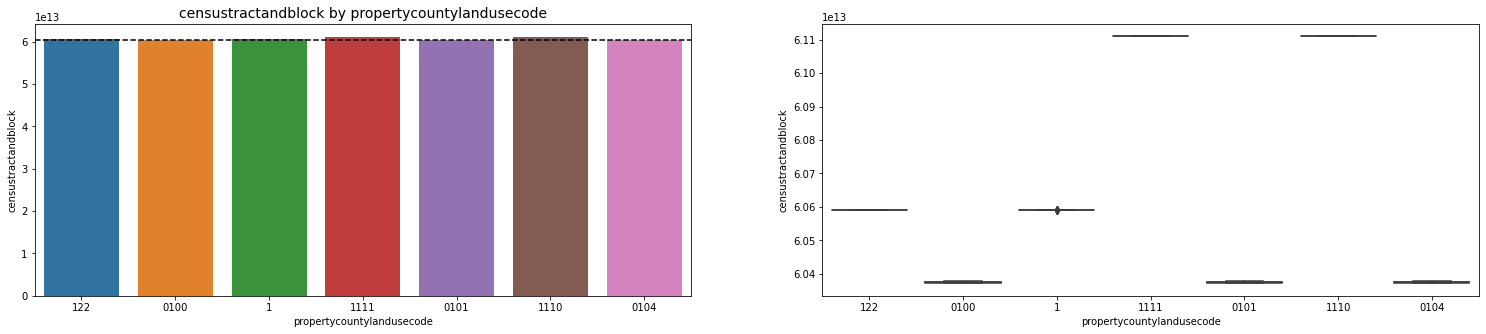

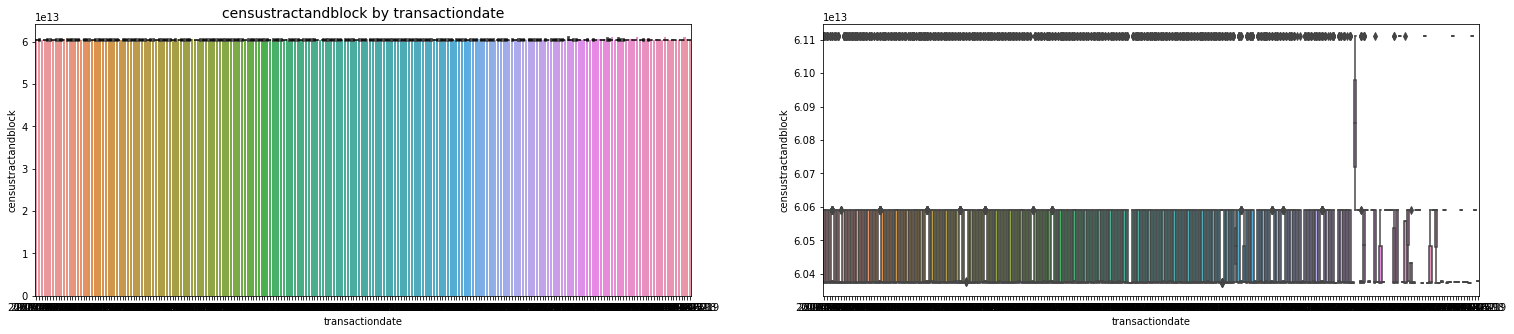

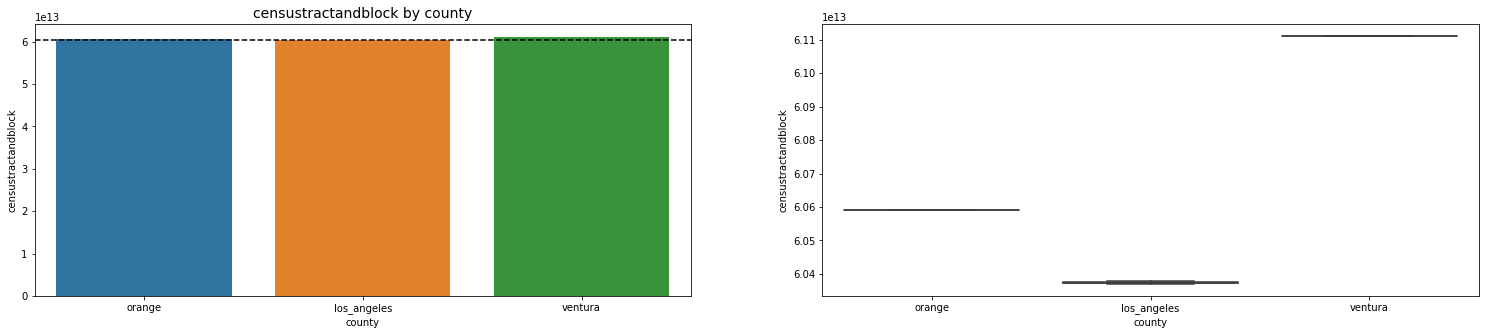

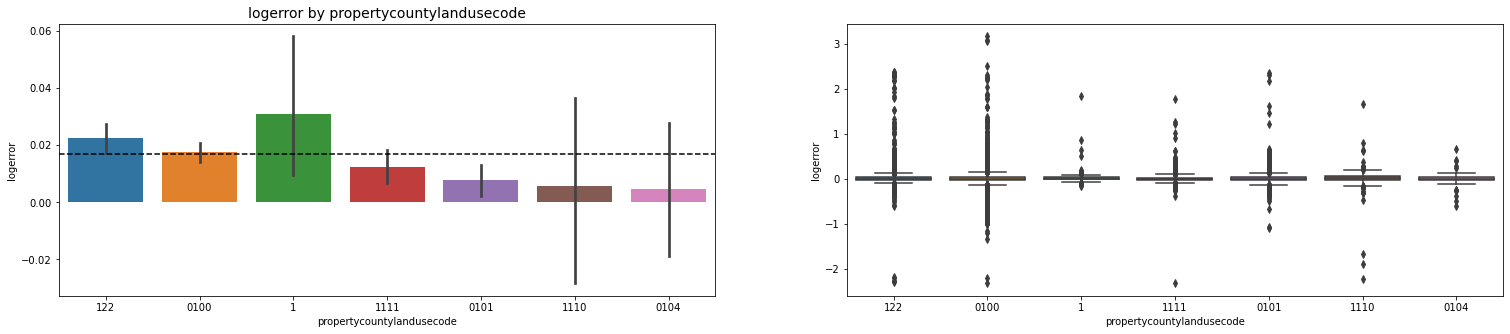

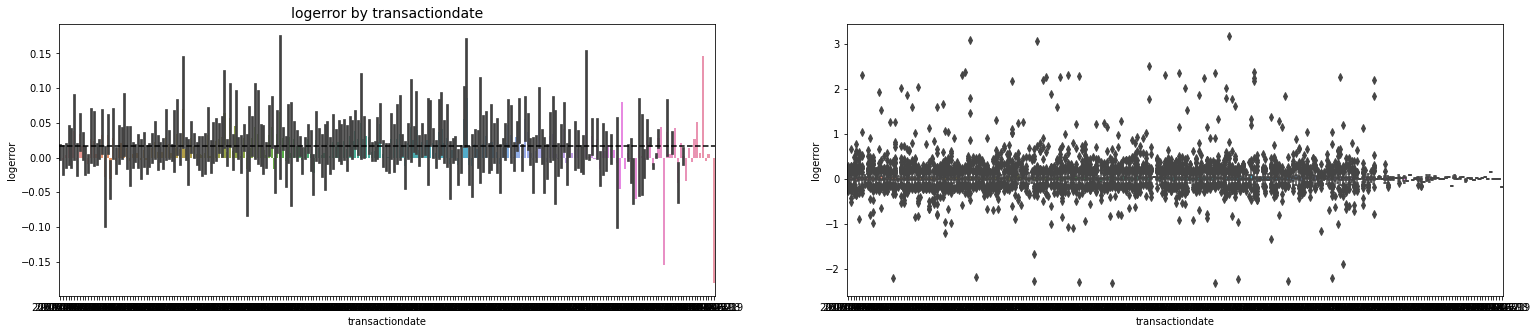

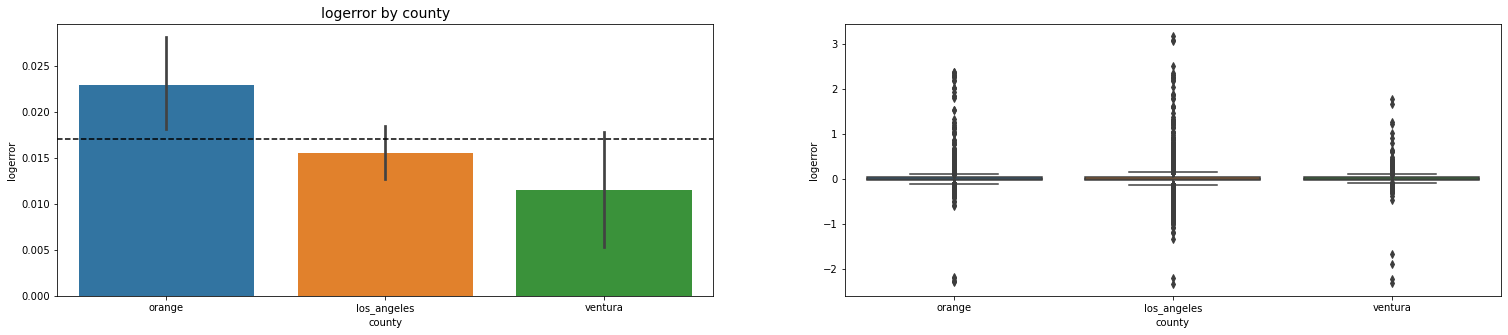

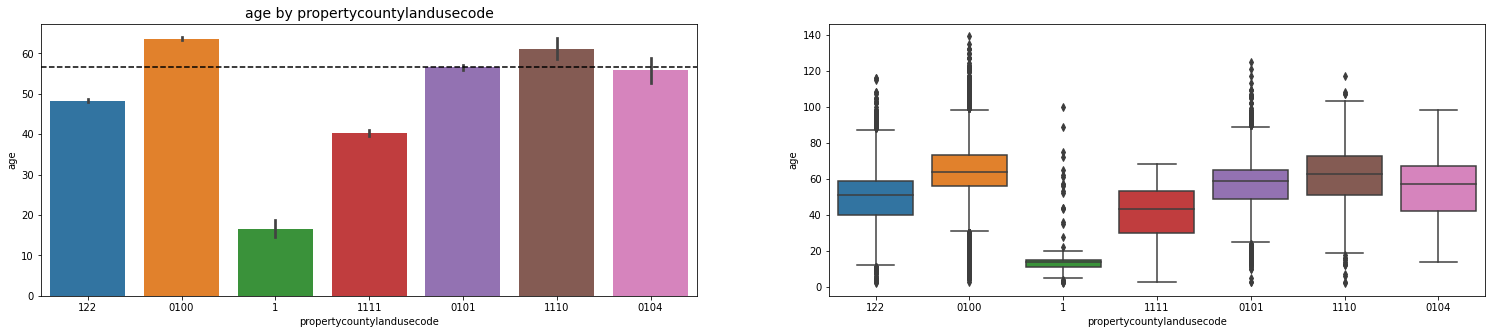

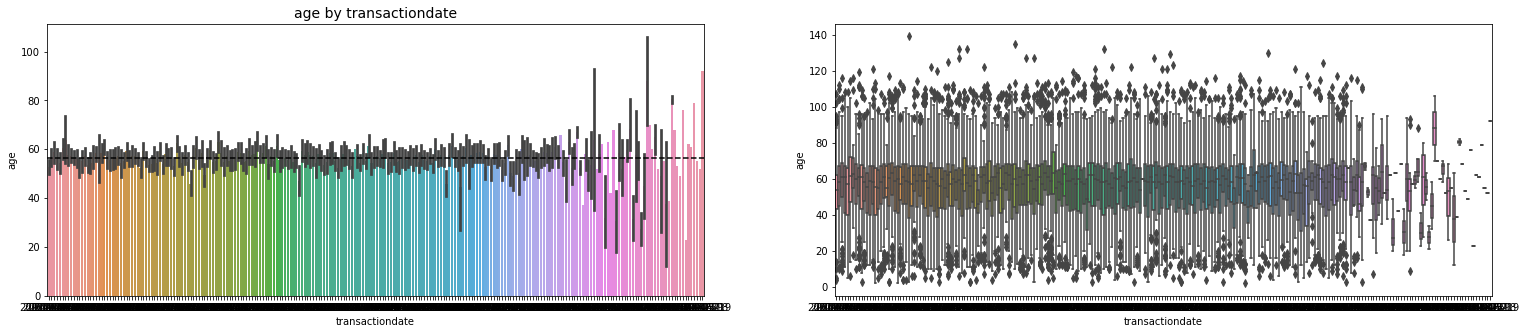

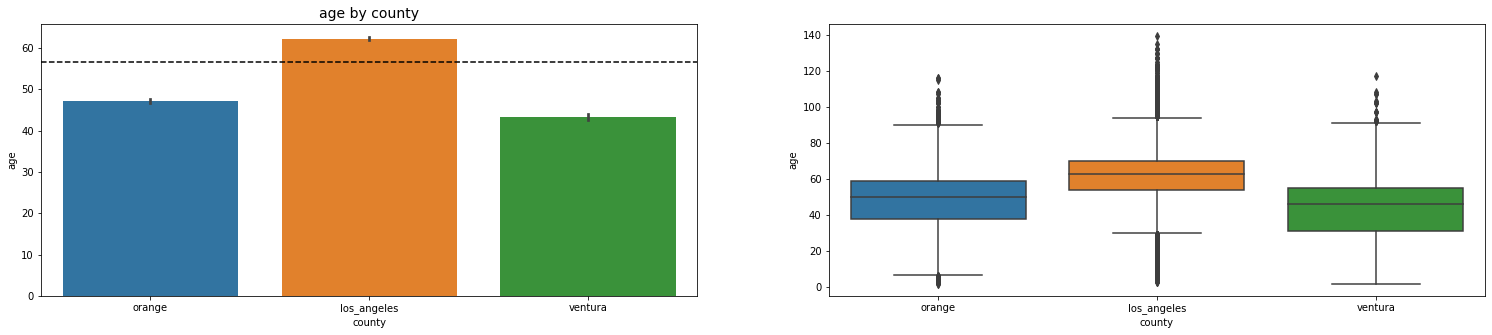

In [11]:

def plot_categorical_and_continuous_vars(train):
    cats = ['propertycountylandusecode', 'transactiondate', 'county']
    quant_dogs = ['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'latitude', 'longitude',
                  'lotsizesquarefeet', 'regionidcity', 'regionidzip', 'structuretaxvaluedollarcnt',
                  'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount', 'censustractandblock',
                  'logerror', 'age']
    for dog in quant_dogs:
        for cat in cats:

            plt.figure(figsize=(40,5))
            
            # barplot of average values
            plt.subplot(131)
            sns.barplot(data=train,
                        x=cat,
                        y=dog)
            plt.axhline(train[dog].mean(), 
                        ls='--', 
                        color='black')
            plt.title(f'{dog} by {cat}', fontsize=14)
            
            # box plot of distributions
            plt.subplot(132)
            sns.boxplot(data=train,
                          x=cat,
                          y=dog)
            
            plt.show()

plot_categorical_and_continuous_vars(train)

In [12]:
mitosheet.sheet(train, analysis_to_replay="id-vzmnfnlhvj")

MitoWidget(analysis_data_json='{"analysisName": "id-vzmnfnlhvj", "analysisToReplay": null, "code": [], "stepSu…

In [ ]:
from mitosheet import *; register_analysis("id-vzmnfnlhvj");
    
# Sorted propertycountylandusecode in train in descending order
train = train.sort_values(by='propertycountylandusecode', ascending=False, na_position='last')

# Filtered propertycountylandusecode in train
train = train[train['propertycountylandusecode'].apply(lambda val: all(val != s for s in ['0104', '0101', '0100', '1110', '1111', '122']))]


In [ ]:
# populate the list of numeric attributes and categorical attributes

num_list = []
cat_list = []

for column in train: 
    if pd.api.types.is_numeric_dtype(train[column]):
        num_list.append(column)
    elif pd.api.types.is_string_dtype(train[column]):
        cat_list.append(column)
        
print(num_list)
print(cat_list)

# so everything is listed as quantitative. Effectively counties really are categories,
# but since they're encoded, I can't see them as that. So, I will have to manually check it that way first. 

In [ ]:
import itertools

quant_dogs = ['tax_value', 'age', 'area', 'beds', 'baths']

#def plot_variable_pairs(train, features):
#    feature_combos = list(itertools.combinations(features, 2))
#    for combo in feature_combos:
#        sns.lmplot(x=combo[0], y=combo[1], data=train, line_kws={'color': 'red'})
#        plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.7}}
#        sns.pairplot(train[cols], hue=hue, kind="reg",plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})
#        plt.show()
#        
#plot_variable_pairs(train, quant_dogs)

def plot_variable_pairs(train, cols, hue=None):
    '''
    This function takes in a df, a list of cols to plot, and default hue=None 
    and displays a pairplot with a red regression line.
    '''
    plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.7}}
    sns.pairplot(train[cols], hue=hue, kind="reg",plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})
    plt.show()
    
plot_variable_pairs(train, quant_dogs)

In [ ]:
def plot_variable_pairs(train, hue=None):
    '''
    This function takes in a df, a list of cols to plot, and default hue=None 
    and displays a pairplot with a red regression line.
    '''
    cols = ['tax_value', 'age', 'area', 'beds', 'baths']
    plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.7}}
    sns.pairplot(train[cols], hue=hue, kind="reg",plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})
    plt.show()

In [ ]:
def tax_correlations(train):
    '''
    Receives the zillow train sample, then uses pandas creates a
    heatmap of the correlations among quantitative features and target. 
    Is also used for X_train_scaled. 
    '''
    # establish figure size
    plt.figure(figsize=(6,6))
    # create the heatmap using the correlation dataframe created above
    heatmap = sns.heatmap(train.corr(), cmap='Purples', annot=True)
    # establish a plot title
    plt.title('Correlations')
    # display the plot
    plt.show()
    
    # visualize predictors' correlation with the target variable 
    plt.figure(figsize=(9,9))
    plt.ylabel('Correlation')
    plt.title('Correlation of features with target of tax_value')
    train.corr().tax_value.sort_values(ascending=False).plot(kind='bar', figsize=(9,9))
    
        # establish figure size
    plt.figure(figsize=(6,6))
    # creat the heatmap using the correlation dataframe created above
    heatmap = sns.heatmap(train.corr()[['tax_value']].sort_values(by='tax_value', ascending=False), vmin=-.5, vmax=.5, annot=True,cmap='flare')
    # establish a plot title
    plt.title('Features Correlated with Tax Value')
    # display the plot
    plt.show()

In [ ]:
def explore_multivariate(train, target, cat_vars, quant_dogs):
    '''
    This function takes in takes in a dataframe, the name of the binary target variable, a list of 
    the names of the categorical variables and a list of the names of the quantitative variables.
    It generates boxplots showing the target variable for each class of the categorical variables 
    against the quantitative variables.
    '''
    for cat in cat_vars:
        for dog in quant_dogs:
            sns.lmplot(x=dog, y=target, data=train, scatter=True, hue=cat, palette ='muted')
            plt.xlabel(dog)
            plt.ylabel(target)
            plt.title(dog + ' vs ' + target + ' by ' + cat)
            plt.show()

In [ ]:
cats = ['beds', 'baths', 'orange']
quant_dogs = ['area', 'los_angeles']
explore_multivariate(train, 'age', cats, quant_dogs)